**ADULT   INCOME   PREDICTION**

















------------------------------------------

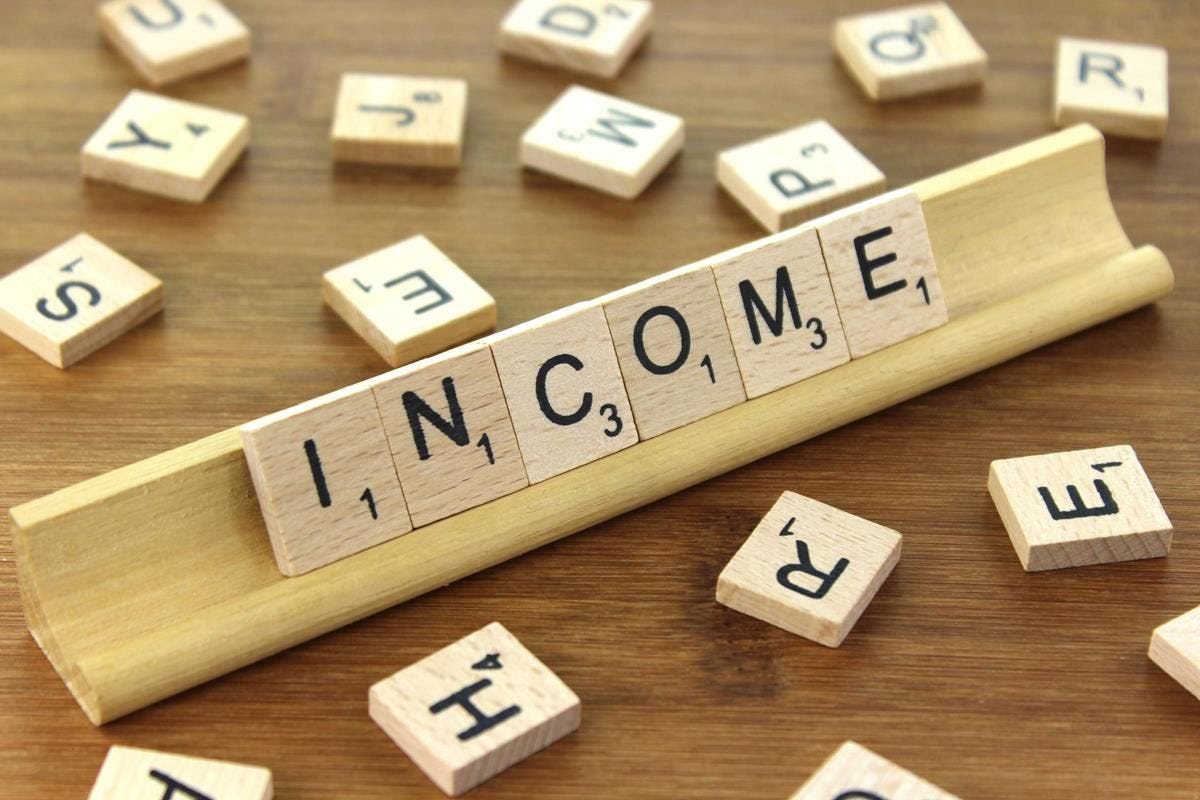

**Adult Income Prediction using Classification Techniques**


    Adult income dataset was extracted by Barry Becker from the 1994 Census database, which consists of 48,842 rows and 15 columns obtained from the same 1994 US Census database.

  **Objective:**

    Predict whether an individual earns more than $50,000 per year based on demographic and socio-economic features.


**ABOUT THE DATASET**

    The Adult Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

1)age: The age of an individual

2)workclass: A general term to represent the employment status of an individual.

      * Private
      * Self.emp.not.inc
      * Self.emp.inc
      * Federal.gov
      * Local.gov
      * State.gov
      * Without.pay
      * Never.worked

3)fnlwgt: Final weight. In other words, this is the number of people the census believes.

4)education: The highest level of education achieved by an individual.

       * Bachelors
       * Some.college
       * 11th
       * HS.grad
       * Prof.school
       * Assoc.acdm
       * Assoc.voc
       * 9th
       * 7th.8th
       * 12th
       * Masters
       * 1st.4th
       * 10th
       * Doctorate
       * 5th.6th
       * Preschool.

5)education.num: The highest level of education achieved in numerical form.

6)marital.status: Marital status of an individual.

       * Married.civ.spouse
       * Divorced
       * Never.married
       * Separated
       * Widowed
       * Married.spouse.absent
       * Married.AF.spouse
Married.civ.spouse corresponds to a civilian spouse while Married.

AF.spouse is a spouse in the Armed Forces.

7)occupation: the general type of occupation of an individual

       * Tech.support
       * Craft.repair
       * Other.service
       * Sales
       * Exec.managerial
       * Prof.specialty
       * Handlers.cleaners
       * Machine.op.inspct
       * Adm.clerical
       * Farming.fishing
       * Transport.moving
       * Priv.house.serv
       * Protective.serv
       * Armed.Forces

8)relationship: Represents what this individual is relative to others. For example an individual could be a Husband. 
Each entry only has one relationship attribute and is somewhat redundant with marital status. 

       * Wife
       * Own.child
       * Husband
       * Not.in.family
       * Other.relative
       * Unmarried.

9)race: Descriptions of an individual’s race

       * White
       * Asian.Pac.Islander::Asian Pacific Islander
       * Amer.Indian.Eskimo::American Indian or Alaska Native
       * Other
       * Black

10)sex: the biological sex of the individual

       * Male
       * Female

11)capital.gain: capital gains for an individual

12)capital.loss: capital loss for an individual

13)hours.per.week: the hours an individual has reported to work per week

14)native.country: country of origin for an individual

       * United.States
       * Cambodia
       * England
       * Puerto.Rico
       * Canada
       * Germany
       * Outlying.US(Guam.USVI.etc)
       * India
       * Japan
       * Greece
       * South
       * China
       * Cuba
       * Iran
       * Honduras
       * Philippines
       * Italy
       * Poland
       * Jamaica
       * Vietnam
       * Mexico
       * Portugal
       * Ireland
       * France
       * Dominican.Republic
       * Laos
       * Ecuador
       * Taiwan
       * Haiti
       * Columbia
       * Hungary
       * Guatemala
       * Nicaragua
       * Scotland
       * Thailand
       * Yugoslavia
       * El.Salvador
       * Trinadad&Tobago
       * Peru
       * Hong
       * Holand.Netherlands

15)income: whether or not an individual makes more than $50,000 annually.

       * <=50k
       * >50k

**STEPS**
------------
  **Data Exploration:**

    1)Explore and visualize the dataset to understand the distribution of features.

    2)Identify missing values, outliers, and correlations.

  **Data Preprocessing:**

    1)Removing outliers.

    2)Handle missing values(drop).

    3)Feature engineering.
    
    4)Encode categorical variables using techniques like get dummies.

    5)Oversampling
    
    6)Seperating training and testing data.
    
    7)Standardize or normalize numeric features.

  **Model Building:**

    1)Train different classification models, such as K-Nearest Neighbors,Naive Bayes,Support Vector Machine,Decision Trees,and Random Forest.

    2)Evaluate models using metrics like accuracy,precision,recall,F1-score.

  **Hyperparameter Tuning:**

    **For selected models, perform hyperparameter tuning using GridSearchCV. And Optimize the models to achieve better performance.

  **Model Evaluation:**

    1)Evaluate the models on the testing set and compare their performance.

    2)Visualize the results using confusion matrices.





**IMPORTING PYTHON LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score


**LOADING DATASET**

In [4]:
df1=pd.read_csv('/home/anusha/Desktop/collab/adult.csv')
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**DATA PREPROCESSING**

In [5]:
#Printing first five rows
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


__

In [6]:
#Printing last five rows
df1.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


__

In [7]:
#Total rows and columns
df1.shape

(48842, 15)

__

In [8]:
#Printing column names
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

__

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


__

In [10]:
#Describing Dataset
df1.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


__

In [11]:
#Printing datatypes
df1.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Here workclass,education,marital-status,occupation,relationship,race,gender are objects. 

In [12]:
df1.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

__

In [13]:
for i in df1.columns:
    print(df1[i].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

**EXPLORATORY DATA ANALYSIS**

In [13]:
df1['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

__

Text(0.5, 1.0, 'WORKCLASS')

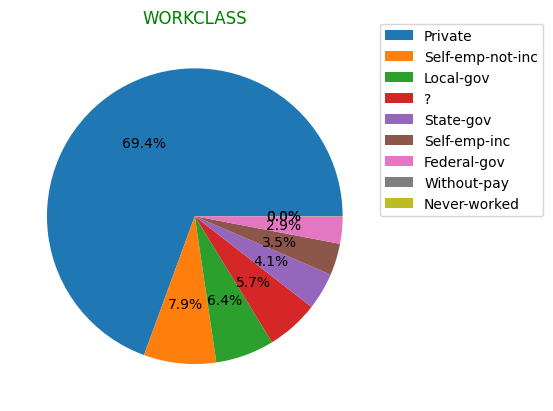

In [14]:
plt.pie(df1['workclass'].value_counts(),autopct='%1.1f%%')
plt.legend(df1['workclass'].value_counts().index,loc=(1,0.5))
plt.title('WORKCLASS',color='green')

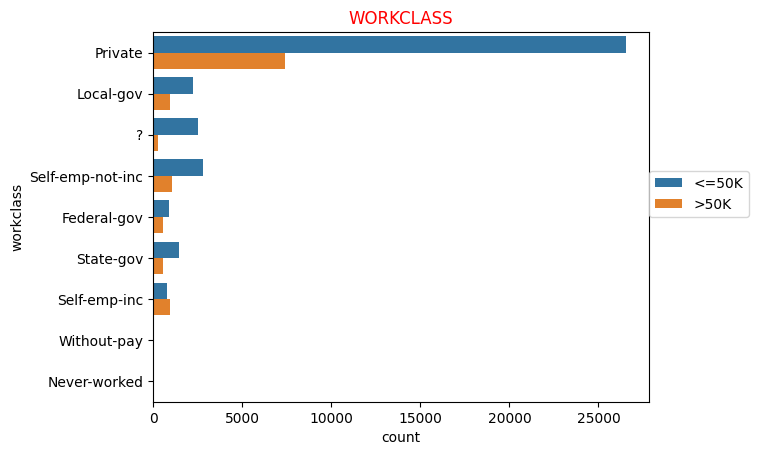

In [15]:
sns.countplot(y='workclass',data=df1,hue='income')
plt.title('WORKCLASS',color='red')
plt.legend(loc=(1,0.5))

Observation:

Majority of the people are working in Private sector and their salary is <=$50k

Compared to other category, highest salary is also in private sector.

In [16]:
df1['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

__

/tmp/ipykernel_3153/654104047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education',data=df1,palette=custom_palette)
/tmp/ipykernel_3153/654104047.py:2: UserWarning: 
The palette list has fewer values (1) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='education',data=df1,palette=custom_palette)


Text(0.5, 1.0, 'EDUCATION')

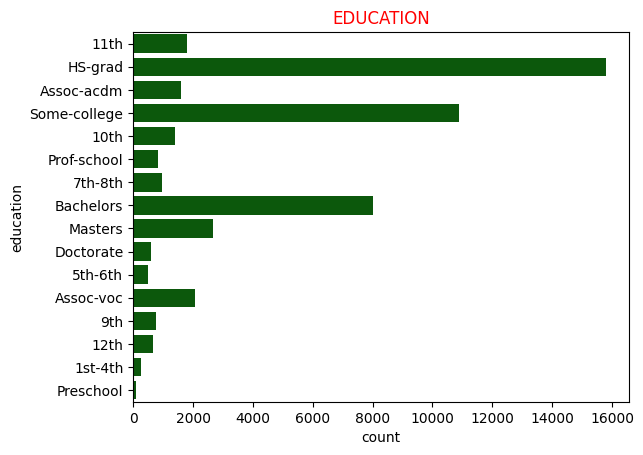

In [17]:
custom_palette=['darkgreen'] 
sns.countplot(y='education',data=df1,palette=custom_palette)
plt.title('EDUCATION',color='red')

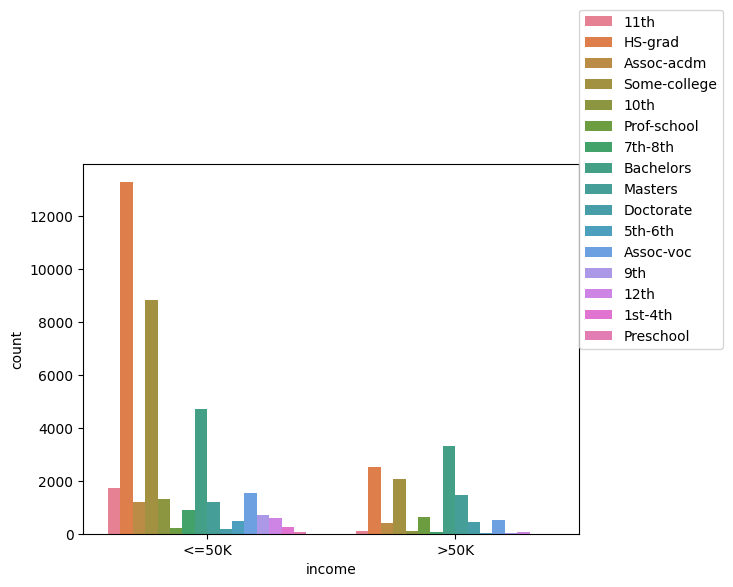

In [18]:
sns.countplot(x='income',data=df1,hue='education')
plt.legend(loc=(1,0.5))

Observation:: 

*The people with bachelors degree earns >50k per year,which is high compared to people having other equalifications.

*The highest number of people who earns <=50k per year holdes a HS-grad.


In [19]:
df1['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

__

Text(0.5, 1.0, 'MARITAL--STATUS')

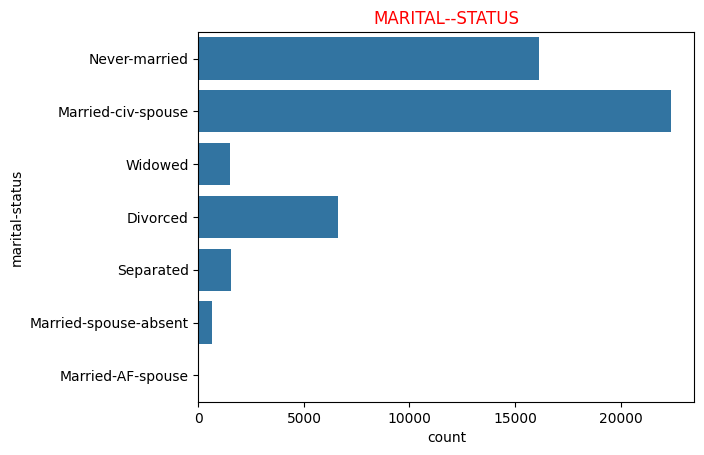

In [20]:
sns.countplot(y='marital-status',data=df1)
plt.title('MARITAL--STATUS',color='red')


__

In [21]:
df1['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

__

Text(0.5, 1.0, 'OCCUPATION')

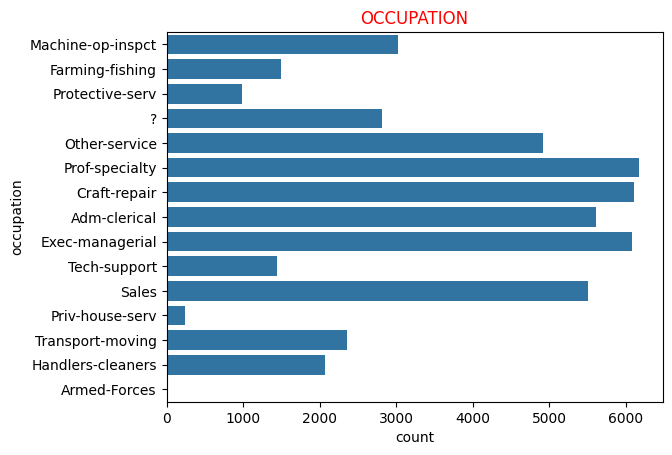

In [22]:
sns.countplot(y='occupation',data=df1)
plt.title('OCCUPATION',color='RED')

__

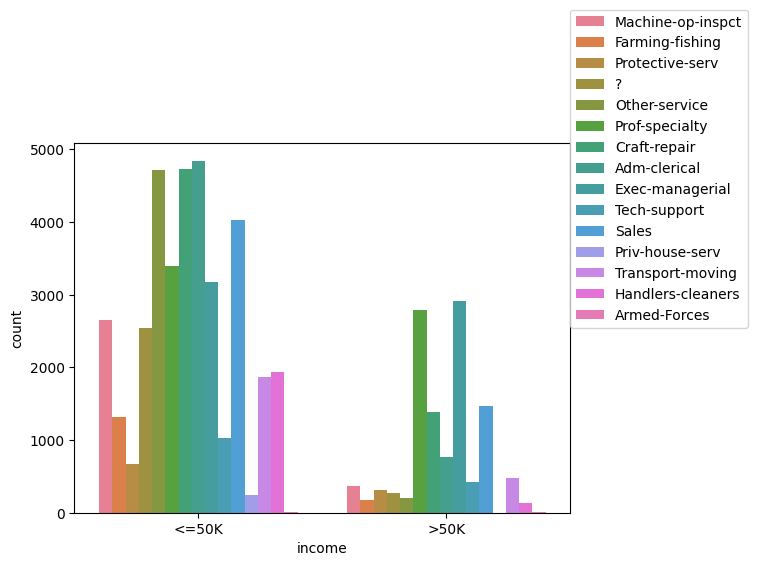

In [23]:
sns.countplot(x='income',data=df1,hue='occupation')
plt.legend(loc=(1,0.5))

Observation::

The highest paying job is Executive manager

In [24]:
df1['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

__

Text(0.5, 1.0, 'RELATIONSHIP')

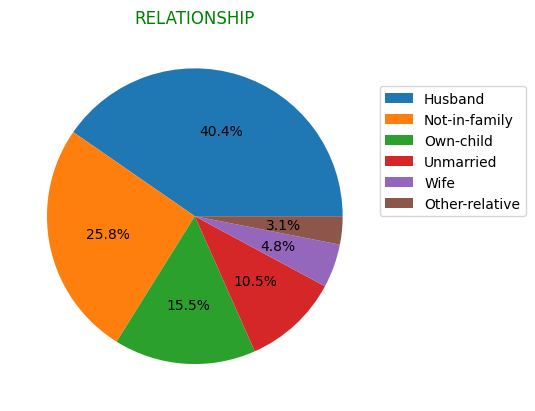

In [25]:
plt.pie(df1['relationship'].value_counts(),autopct='%1.1f%%')
plt.legend(df1['relationship'].value_counts().index,loc=(1,0.5))
plt.title('RELATIONSHIP',color='green')

__

In [26]:
df1['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

__

Text(0, 0.5, 'count')

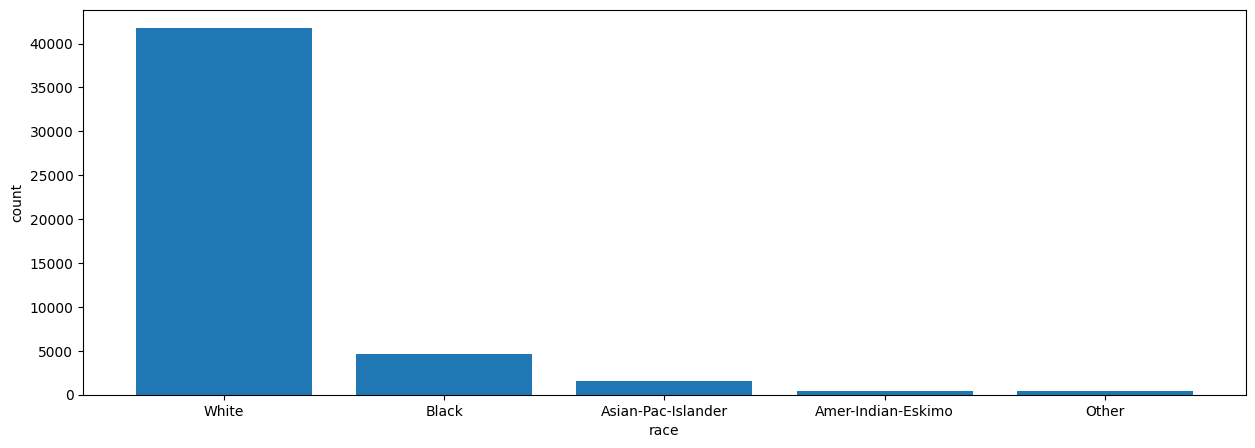

In [27]:
plt.figure(figsize=(15,5))
plt.bar(df1['race'].value_counts().index,df1['race'].value_counts())
plt.xlabel('race')
plt.ylabel('count')

__

In [28]:
df1['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

__

Text(0.5, 1.0, 'GENDER')

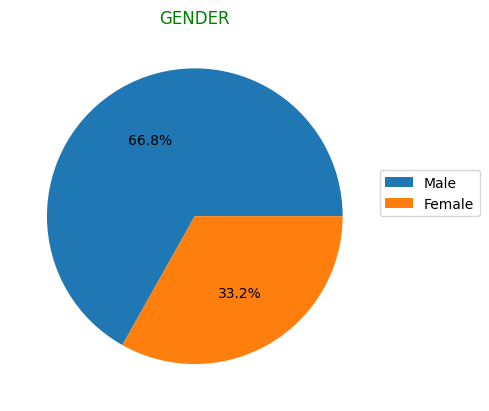

In [29]:
plt.pie(df1['gender'].value_counts(),autopct='%1.1f%%')
plt.legend(df1['gender'].value_counts().index,loc=(1,0.5))
plt.title('GENDER',color='green')

__

In [30]:
df1['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

Observation::

Majority of the adults are natives of us.Some of them are from mexico and very few from other countries

<Axes: xlabel='count', ylabel='native-country'>

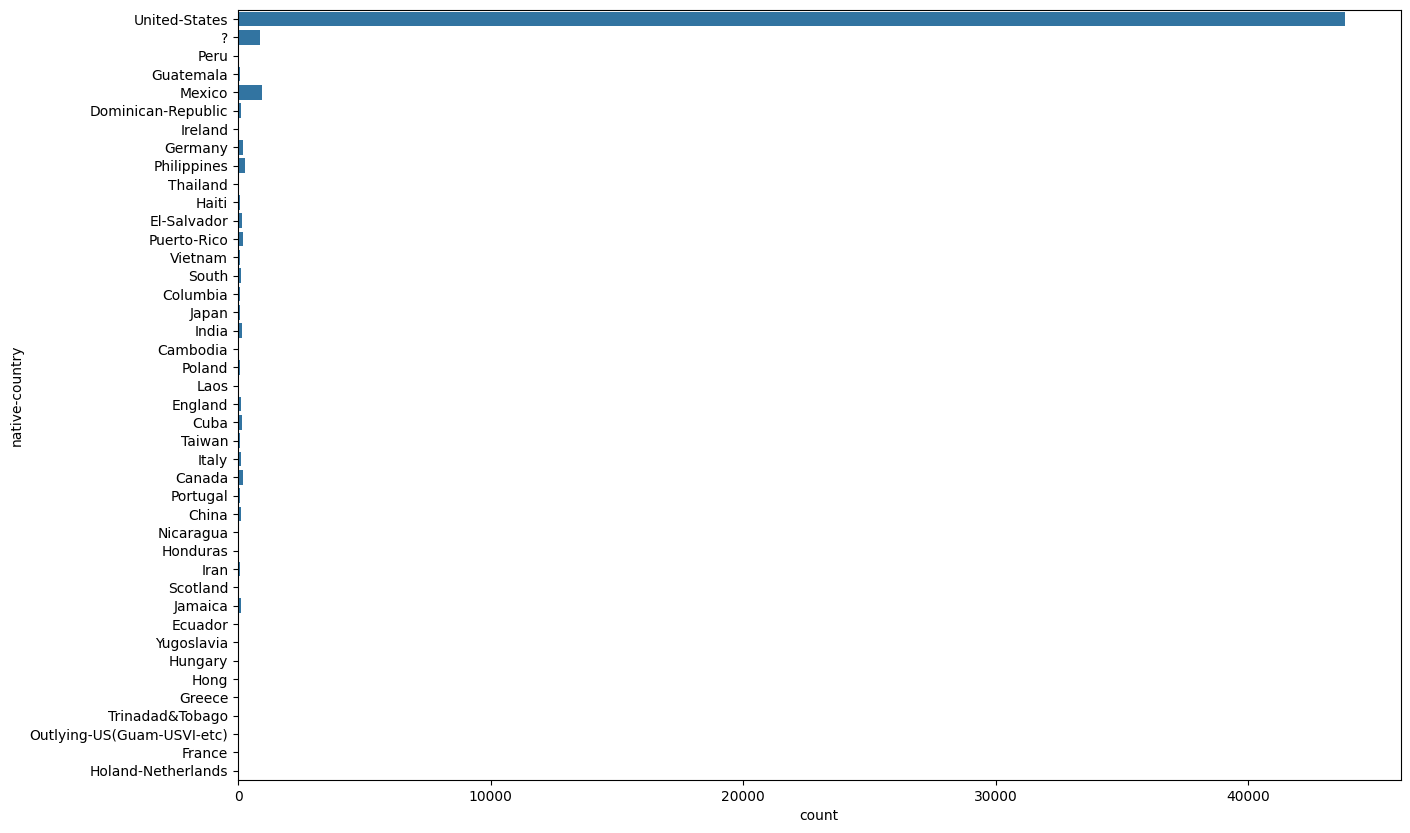

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(y='native-country',data=df1)

__

In [32]:
df1['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

__

Text(0.5, 1.0, 'TARGET')

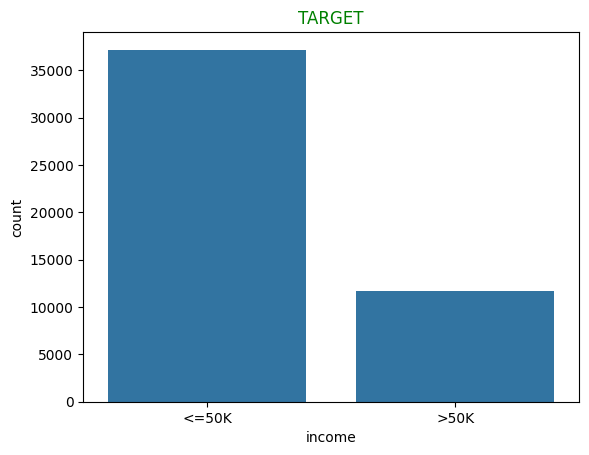

In [33]:
sns.countplot(x='income',data=df1)
plt.title('TARGET',color='green')

Observation::

Very few number of people are getting salary >50k

This is an imbalanced dataset.So we need to balance the dataset

**REMOVING OUTLIERS**

Outliers in a dataset are data points that significantly differ from the majority of the other data points. They can be unusually high or low values compared to the rest of the data and may skew the overall analysis or interpretation of the dataset. 

In [14]:
df1.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


__

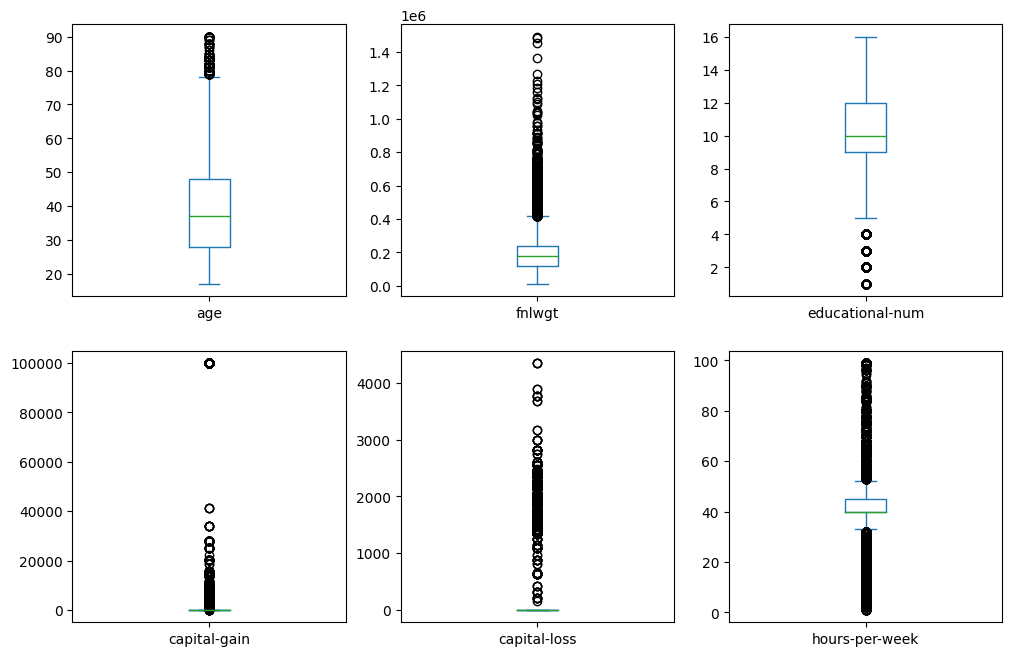

In [15]:
df1.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

Outliers are present in all columns, but it is not necessary to remove outliers from fnlwgt, educational-num, capital-gain, capital-loss, and hours-per-week. This is because fnlwgt and educational-num are going to be deleted. And all the values in hours-per-week are needed, because there are persons with no job and extra time work.

__

In [16]:
# Identify and remove outliers using IQR method
def remove_outliers_iqr(dataframe,column):
    Q1=dataframe[column].quantile(0.25)
    Q3=dataframe[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]


columns=['age']
for i in columns:
    df=remove_outliers_iqr(df1,i)

# Display information about the dataset after removing outliers
print("\nDataset info after removing outliers:")
print(df.info())


Dataset info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 48626 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48626 non-null  int64 
 1   workclass        48626 non-null  object
 2   fnlwgt           48626 non-null  int64 
 3   education        48626 non-null  object
 4   educational-num  48626 non-null  int64 
 5   marital-status   48626 non-null  object
 6   occupation       48626 non-null  object
 7   relationship     48626 non-null  object
 8   race             48626 non-null  object
 9   gender           48626 non-null  object
 10  capital-gain     48626 non-null  int64 
 11  capital-loss     48626 non-null  int64 
 12  hours-per-week   48626 non-null  int64 
 13  native-country   48626 non-null  object
 14  income           48626 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB
None


__

In [17]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48626.000000,4.862600e+04,48626.000000,48626.000000,48626.000000,48626.000000
mean,38.443631,1.898154e+05,10.081931,1076.534488,87.337186,40.477995
std,13.404926,1.056570e+05,2.565011,7450.412818,402.052656,12.339000
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783205e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378110e+05,12.000000,0.000000,0.000000,45.000000
max,78.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='age'>

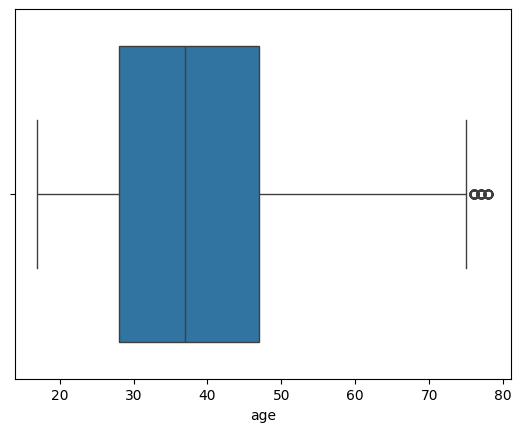

In [18]:
sns.boxplot(x=df['age'])

__

In [19]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


__

In [20]:
#Correcting index order
df.reset_index(drop=True,inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48622,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48623,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48624,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Hence the outliers are removed from the dataset

**MISSING VALUE HANDLING**

In [21]:
#Checking for special character '?'
df.isin(['?']).sum()

age                   0
workclass          2750
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2760
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      852
income                0
dtype: int64

__

In [22]:
#Checking for null value
df.isin(['null']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

__

In [23]:
#Replacing special character
df['native-country']=df['native-country'].replace('?',np.NaN)
df['occupation']=df['occupation'].replace('?',np.NaN)
df['workclass']=df['workclass'].replace('?',np.NaN)
df.isin(['?']).sum()

/tmp/ipykernel_4010/178687878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country']=df['native-country'].replace('?',np.NaN)
/tmp/ipykernel_4010/178687878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=df['occupation'].replace('?',np.NaN)
/tmp/ipykernel_4010/178687878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64



Missing values are found in workclass,occupation,native-country


In [24]:
#Filling missing values
lst=['workclass','occupation','native-country']
for i in lst:
  df[i]=df[i].fillna(df[i].mode() [0])
df.isna().sum()

/tmp/ipykernel_4010/273107798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].fillna(df[i].mode() [0])


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**FEATURE ENGINEERING**

1)Replacing values in column with suitable common categories

2)Correlation

In [25]:
# education Category
df.education= df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th'],'school')
df.education = df.education.replace(['HS-grad','9th','10th'],'high school')
df.education = df.education.replace(['11th','12th','Assoc-voc','Assoc-acdm','Prof-school'],'higher')
df.education = df.education.replace(['Bachelors','Some-college'],'ug')
df.education = df.education.replace('Masters','pg')
df.education = df.education.replace('Doctorate','doc')

/tmp/ipykernel_4010/2229054725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education= df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th'],'school')
/tmp/ipykernel_4010/2229054725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education = df.education.replace(['HS-grad','9th','10th'],'high school')
/tmp/ipykernel_4010/2229054725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

__

In [26]:
#martial status
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],'married')
df['marital-status']= df['marital-status'].replace(['Never-married'],'single')
df['marital-status']= df['marital-status'].replace(['Divorced','Separated','Widowed'],'other')

/tmp/ipykernel_4010/4146796147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status']= df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent'],'married')
/tmp/ipykernel_4010/4146796147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status']= df['marital-status'].replace(['Never-married'],'single')
/tmp/ipykernel_4010/4146796147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

__

In [27]:
# income
df.income=df.income.replace('<=50K',0)
df.income=df.income.replace('>50K',1)

/tmp/ipykernel_4010/71522988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income=df.income.replace('<=50K',0)
/tmp/ipykernel_4010/71522988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income=df.income.replace('>50K',1)


income <=50k == 0

income >50k == 1


**ENCODING**

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called encoding.


Here i used get_dummies for encoding. 

In [28]:
#Get dummies
dfg=pd.get_dummies(df[['workclass','marital-status','education','occupation','relationship','gender','race','native-country']],drop_first=True)
dfg = dfg.astype(int)
dfg

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_other,marital-status_single,education_high school,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48622,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48623,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
48624,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


__

In [29]:
#Concatenate df and dfg
df2=pd.concat([df,dfg],axis=1)
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,Private,226802,higher,7,single,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,89814,high school,9,married,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,44,Private,160323,ug,10,married,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,18,Private,103497,ug,10,single,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,27,Private,257302,higher,12,married,Tech-support,Wife,White,Female,...,0,0,0,0,0,0,0,1,0,0
48622,40,Private,154374,high school,9,married,Machine-op-inspct,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
48623,58,Private,151910,high school,9,other,Adm-clerical,Unmarried,White,Female,...,0,0,0,0,0,0,0,1,0,0
48624,22,Private,201490,high school,9,single,Adm-clerical,Own-child,White,Male,...,0,0,0,0,0,0,0,1,0,0


2)correlation

In [30]:
lab=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=lab.fit_transform(df[i])

df

/tmp/ipykernel_4010/4015602104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=lab.fit_transform(df[i])
/tmp/ipykernel_4010/4015602104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=lab.fit_transform(df[i])
/tmp/ipykernel_4010/4015602104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,2,7,2,6,3,2,1,0,0,40,38,0
1,38,3,89814,1,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,2,12,0,10,0,4,1,0,0,40,38,1
3,44,3,160323,5,10,0,6,0,2,1,7688,0,40,38,1
4,18,3,103497,5,10,2,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,27,3,257302,2,12,0,12,5,4,0,0,0,38,38,0
48622,40,3,154374,1,9,0,6,0,4,1,0,0,40,38,1
48623,58,3,151910,1,9,1,0,4,4,0,0,0,40,38,0
48624,22,3,201490,1,9,2,0,3,4,1,0,0,20,38,0


__

In [31]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.044682,-0.073969,-0.052827,0.036634,-0.475407,-0.002062,-0.266097,0.027887,0.089440,0.078209,0.057096,0.088432,-0.002549,0.238753
workclass,0.044682,1.000000,-0.026585,-0.017515,0.008264,-0.053504,0.010017,-0.055670,0.053304,0.066432,0.031538,0.004110,0.043837,-0.004672,-0.000296
fnlwgt,-0.073969,-0.026585,1.000000,0.003388,-0.039351,0.033499,-0.001691,0.008762,-0.027507,0.028055,-0.003545,-0.003828,-0.015251,-0.058567,-0.006391
education,-0.052827,-0.017515,0.003388,1.000000,0.324169,0.042489,0.028058,-0.011138,0.012980,-0.028414,0.007406,0.021200,-0.002989,-0.006409,0.100909
educational-num,0.036634,0.008264,-0.039351,0.324169,1.000000,-0.057694,0.073264,-0.091472,0.029002,0.009526,0.124924,0.081271,0.142103,0.091069,0.332407
marital-status,-0.475407,-0.053504,0.033499,0.042489,-0.057694,1.000000,0.003372,0.443054,-0.076091,-0.329636,-0.079798,-0.073434,-0.229008,0.020455,-0.416888
occupation,-0.002062,0.010017,-0.001691,0.028058,0.073264,0.003372,1.000000,-0.034802,-0.005158,0.042279,0.014756,0.011322,-0.014846,-0.001604,0.032848
relationship,-0.266097,-0.055670,0.008762,-0.011138,-0.091472,0.443054,-0.034802,1.000000,-0.116994,-0.580266,-0.056200,-0.057303,-0.253629,-0.007130,-0.253911
race,0.027887,0.053304,-0.027507,0.012980,0.029002,-0.076091,-0.005158,-0.116994,1.000000,0.087105,0.011332,0.018536,0.040044,0.118127,0.070839
gender,0.089440,0.066432,0.028055,-0.028414,0.009526,-0.329636,0.042279,-0.580266,0.087105,1.000000,0.046723,0.046226,0.229996,-0.002596,0.214776


__

<Axes: >

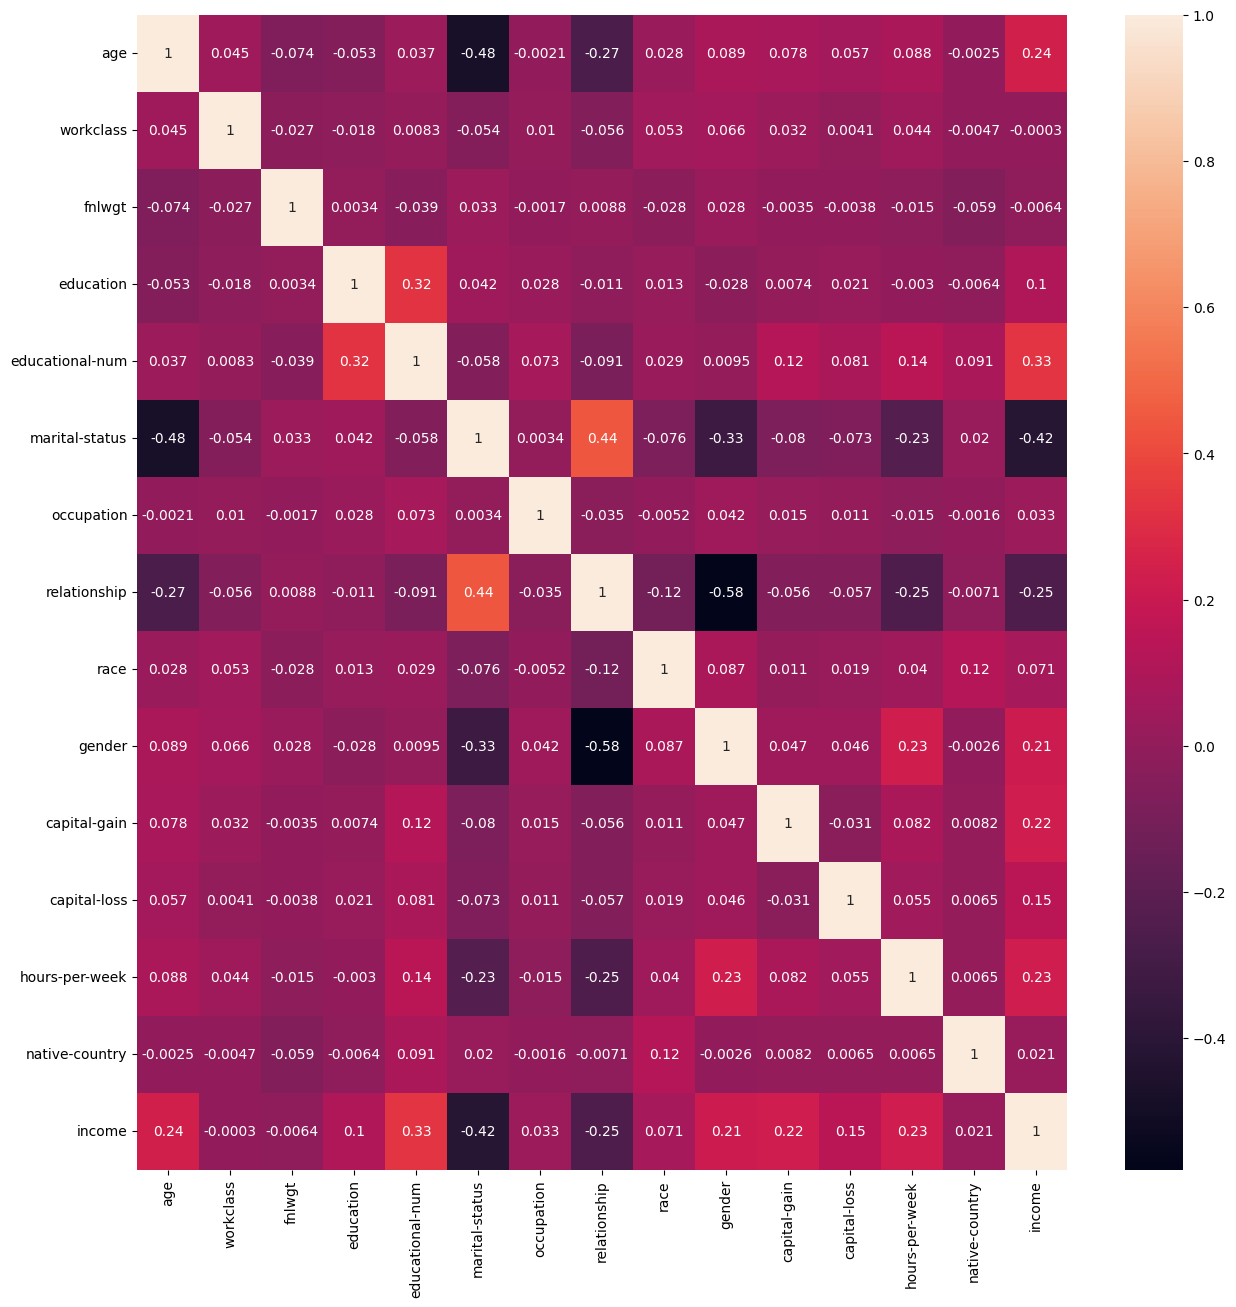

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)



Here the columns,fnlwgt,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country are dropping.

1)fnlwgt is the number of people who belives in the dataset (census).It is negatively correlated.So this is not affect our target.

2)education and also educational num is provided.educational num is the numerical form of education.Both columns are equal.Education is enough.so educational-num is dropping.

3)The columns,workclass,education,marital-status,occupation,relationship,race,gender,native-country are droping after encoding.


In [33]:
df2.drop(['fnlwgt','workclass','education','educational-num','marital-status','occupation','relationship','gender','race','native-country'],axis=1,inplace=True)
df2

,age,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,27,0,0,38,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48622,40,0,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48623,58,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48624,22,0,0,20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**SEPERATE X AND Y**

In [34]:
#x as input
x=df2.drop(['income'],axis=1).values
x

array([[   25,     0,     0, ...,     1,     0,     0],
       [   38,     0,     0, ...,     1,     0,     0],
       [   28,     0,     0, ...,     1,     0,     0],
       ...,
       [   58,     0,     0, ...,     1,     0,     0],
       [   22,     0,     0, ...,     1,     0,     0],
       [   52, 15024,     0, ...,     1,     0,     0]])

__

In [35]:
#y as output
y=df2['income'].values
y

array([0, 0, 1, ..., 0, 0, 1])

**OVERSAMPLING**

In [36]:
smote=SMOTE(sampling_strategy='auto',random_state=42)
x1,y1=smote.fit_resample(x,y)

__

In [37]:
x1.shape

(73954, 81)

__

In [38]:
y1.shape

(73954,)

__

**TRAIN TEST SPLIT**

A train_test_split function is used for spliting the datasets into a training set and a testing set. The training set is used for training the model, and the testing set is used to testing the model. This allows us to train the models on the training set, and then test their accuracy on the unseen testing set.


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

__

In [40]:
x_train

array([[   37,     0,     0, ...,     1,     0,     0],
       [   61, 15024,     0, ...,     1,     0,     0],
       [   24,     0,     0, ...,     0,     0,     0],
       ...,
       [   58,     0,     0, ...,     1,     0,     0],
       [   41,     0,     0, ...,     1,     0,     0],
       [   22,     0,     0, ...,     1,     0,     0]])

__

In [41]:
x_test

array([[45,  0,  0, ...,  1,  0,  0],
       [61,  0,  0, ...,  1,  0,  0],
       [53,  0,  0, ...,  1,  0,  0],
       ...,
       [42,  0,  0, ...,  1,  0,  0],
       [24,  0,  0, ...,  0,  0,  0],
       [49,  0,  0, ...,  0,  1,  0]])

__

In [42]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

__

In [43]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

**SCALING USING MINMAXSCALER**

Normalization in machine learning is the process of translating data into the range [0,1] (or any other range) or simply transforming data onto the unit sphere. Some machine learning algorithms benefit from normalization and standardization, particularly when Euclidean distance is used.


In [44]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

__

In [45]:
x_train

array([[0.32786885, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72131148, 0.1502415 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1147541 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67213115, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39344262, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08196721, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [46]:
x_test

array([[0.45901639, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72131148, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.59016393, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.40983607, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1147541 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.52459016, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

**MODEL CREATION**

Here use classification algorithms. Such as

1)K Nearest Neighbors

2)Naive Bayes

3)Support Vector Machine

4)Decision Tree

5)Random Forest


In [47]:
#K-NEIGHBORS CLASSIFICATION
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train,y_train)

#Predicting output using x_test
y_pred1=knn1.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     11098
           1       0.85      0.88      0.87     11089

    accuracy                           0.86     22187
   macro avg       0.86      0.86      0.86     22187
weighted avg       0.86      0.86      0.86     22187



__

In [67]:
#NAIVE BAYES CLASSIFICATION
naiv1=BernoulliNB()
naiv1.fit(x_train,y_train)

y_pred2=naiv1.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82     11098
           1       0.80      0.88      0.84     11089

    accuracy                           0.83     22187
   macro avg       0.83      0.83      0.83     22187
weighted avg       0.83      0.83      0.83     22187



__

In [68]:
#SUPPORT VECTOR CLASSIFICATION
sv1=SVC()
sv1.fit(x_train,y_train)

y_pred3=sv1.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11098
           1       0.87      0.86      0.86     11089

    accuracy                           0.86     22187
   macro avg       0.86      0.86      0.86     22187
weighted avg       0.86      0.86      0.86     22187



__

In [48]:
#DECISION TREE CLASSIFICATION
dec1=DecisionTreeClassifier(criterion='entropy',random_state=3)
dec1.fit(x_train,y_train)

y_pred4=dec1.predict(x_test)
print(classification_report(y_test,y_pred4))



              precision    recall  f1-score   support

           0       0.88      0.85      0.87     11098
           1       0.86      0.88      0.87     11089

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

In [70]:
#RANDOM FOREST CLASSIFICATION
rand1=RandomForestClassifier(n_estimators=100,random_state=1)
rand1.fit(x_train,y_train)

y_pred5=rand1.predict(x_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11098
           1       0.87      0.90      0.89     11089

    accuracy                           0.88     22187
   macro avg       0.88      0.88      0.88     22187
weighted avg       0.88      0.88      0.88     22187



**HYPER PARAMETER TUNING**

In [71]:
#KNN
knn2=KNeighborsClassifier()

#parameter
params_knn={'n_neighbors':[5,7,9,11,13,15],'weights':['uniform','distance']}

#object for GridSearchCV
clf1=GridSearchCV(knn2,params_knn,cv=5,scoring='accuracy')
clf1.fit(x_train,y_train)
print(clf1.best_params_)

{'n_neighbors': 9, 'weights': 'distance'}


__

In [106]:
#KNN AFTER HYPER PARAMETER TUNING
knn3=KNeighborsClassifier(n_neighbors=9,weights='distance')
knn3.fit(x_train,y_train)

y_pred_knn=knn3.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     11098
           1       0.85      0.88      0.87     11089

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

In [73]:
#NAIVE BAYES
naiv2=BernoulliNB()

params_naiv={'alpha':[0.1, 0.5, 1.0, 1.5],'binarize':[0.0, 0.1, 0.2],'fit_prior':[True, False]}
clf2=GridSearchCV(naiv2,params_naiv,cv=5,scoring='accuracy')
clf2.fit(x_train,y_train)
print(clf2.best_params_)

{'alpha': 1.0, 'binarize': 0.1, 'fit_prior': True}


__

In [107]:
#NAIVE BAYES AFTER HYPER PARAMETER TUNING
naiv3=BernoulliNB(alpha=1.0,binarize=0.1,fit_prior=True)
naiv3.fit(x_train,y_train)

y_pred_naiv=naiv3.predict(x_test)
print(classification_report(y_test,y_pred_naiv))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83     11098
           1       0.80      0.90      0.85     11089

    accuracy                           0.84     22187
   macro avg       0.84      0.84      0.84     22187
weighted avg       0.84      0.84      0.84     22187



__

In [75]:
#SUPPORT VECTOR CLASSIFIER
sv2=SVC()
params_sv={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto']}
clf3=GridSearchCV(sv2,params_sv,cv=5,scoring='accuracy')
clf3.fit(x_train,y_train)
print(clf3.best_params_)

{'gamma': 'scale', 'kernel': 'poly'}


__

In [76]:
#SVM AFTER HYPER PARAMETER TUNING
sv3=SVC(gamma='scale',kernel= 'poly')
sv3.fit(x_train,y_train)
y_pred_sv=sv3.predict(x_test)
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11098
           1       0.87      0.87      0.87     11089

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

In [49]:
#DECISION TREE
dec2=DecisionTreeClassifier()
params_dec={'criterion':['entropy'],'splitter':['best','random']}
clf4=GridSearchCV(dec2,params_dec,cv=5,scoring='accuracy')
clf4.fit(x_train,y_train)
print(clf4.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


__

In [50]:
#DECISION TREE CLASSIFICATION AFTER HYPER PARAMETER TUNING
dec3=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=3)
dec3.fit(x_train,y_train)
y_pred_dec=dec3.predict(x_test)
print(classification_report(y_test,y_pred_dec))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     11098
           1       0.86      0.88      0.87     11089

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

In [79]:
#RANDOM FOREST
rand2=RandomForestClassifier()
params_rand={'n_estimators':[50,75,100,125,150],'criterion':['entropy']}
clf5=GridSearchCV(rand2,params_rand,cv=5,scoring='accuracy')
clf5.fit(x_train,y_train)
print(clf5.best_params_)

{'criterion': 'entropy', 'n_estimators': 75}


__

In [105]:
#RANDOM FOREST CLASSIFICATION AFTER HYPER PARAMETER TUNING
rand3=RandomForestClassifier(criterion='entropy',n_estimators=75,random_state=1)
rand3.fit(x_train,y_train)
y_pred_rand=rand3.predict(x_test)
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11098
           1       0.87      0.90      0.89     11089

    accuracy                           0.88     22187
   macro avg       0.88      0.88      0.88     22187
weighted avg       0.88      0.88      0.88     22187



**PERFORMANCE EVALUATION**

In [108]:
#knn
matx1=confusion_matrix(y_pred_knn,y_test)
print(matx1)

[[9424 1289]
 [1674 9800]]


__

In [109]:
score_knn=accuracy_score(y_pred_knn,y_test)
score_knn

0.8664533285257132

__

In [110]:
report_knn=classification_report(y_pred_knn,y_test)
print(report_knn)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10713
           1       0.88      0.85      0.87     11474

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

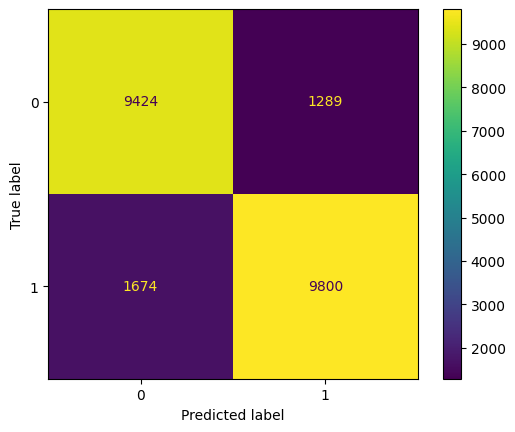

In [111]:
label=['0','1']
cmd=ConfusionMatrixDisplay(matx1,display_labels=label)
cmd.plot()

In [112]:
#naive bayes
matx2=confusion_matrix(y_pred_naiv,y_test)
print(matx2)

[[8593 1104]
 [2505 9985]]


__

In [113]:
score_naiv=accuracy_score(y_pred_naiv,y_test)
score_naiv

0.8373371794293956

__

In [114]:
report_naiv=classification_report(y_pred_naiv,y_test)
print(report_naiv)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      9697
           1       0.90      0.80      0.85     12490

    accuracy                           0.84     22187
   macro avg       0.84      0.84      0.84     22187
weighted avg       0.85      0.84      0.84     22187



__

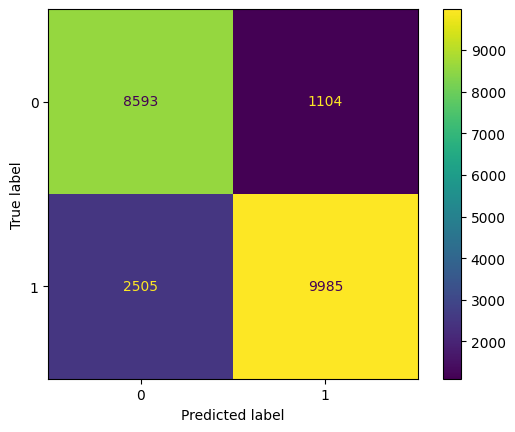

In [115]:
label=['0','1']
cmd=ConfusionMatrixDisplay(matx2,display_labels=label)
cmd.plot()

In [116]:
#svm
matx3=confusion_matrix(y_pred_sv,y_test)
print(matx3)

[[9608 1493]
 [1490 9596]]


__

In [117]:
score_svm=accuracy_score(y_pred_sv,y_test)
score_svm

0.8655518997611213

__

In [118]:
report_svm=classification_report(y_pred_sv,y_test)
print(report_svm)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11101
           1       0.87      0.87      0.87     11086

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

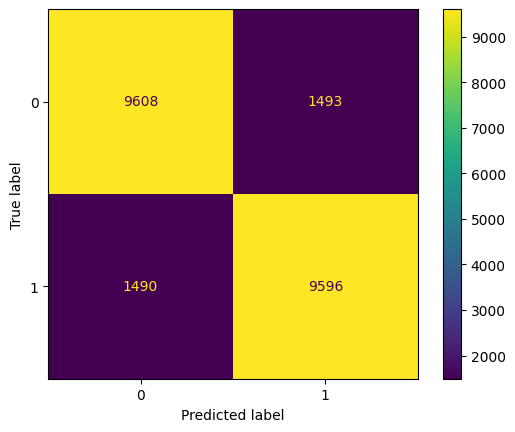

In [119]:
label=['0','1']
cmd=ConfusionMatrixDisplay(matx3,display_labels=label)
cmd.plot()

In [51]:
#Decision tree
matx4=confusion_matrix(y_pred_dec,y_test)
print(matx4)

[[9478 1338]
 [1620 9751]]


__

In [52]:
score_dec=accuracy_score(y_pred_dec,y_test)
score_dec

0.8666786857168612

__

In [53]:
report_dec=classification_report(y_pred_dec,y_test)
print(report_dec)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     10816
           1       0.88      0.86      0.87     11371

    accuracy                           0.87     22187
   macro avg       0.87      0.87      0.87     22187
weighted avg       0.87      0.87      0.87     22187



__

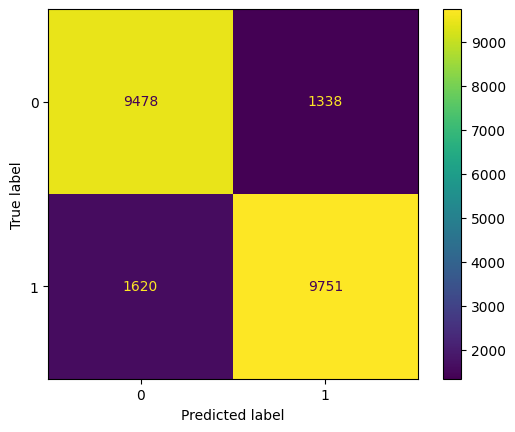

In [54]:
label=['0','1']
cmd=ConfusionMatrixDisplay(matx4,display_labels=label)
cmd.plot()

In [124]:
#Randome forest
matx5=confusion_matrix(y_pred_rand,y_test)
print(matx5)

[[9659 1138]
 [1439 9951]]


__

In [125]:
score_rand=accuracy_score(y_pred_rand,y_test)
score_rand

0.8838509036823365

__

In [126]:
report_rand=classification_report(y_pred_rand,y_test)
print(report_rand)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     10797
           1       0.90      0.87      0.89     11390

    accuracy                           0.88     22187
   macro avg       0.88      0.88      0.88     22187
weighted avg       0.88      0.88      0.88     22187



__

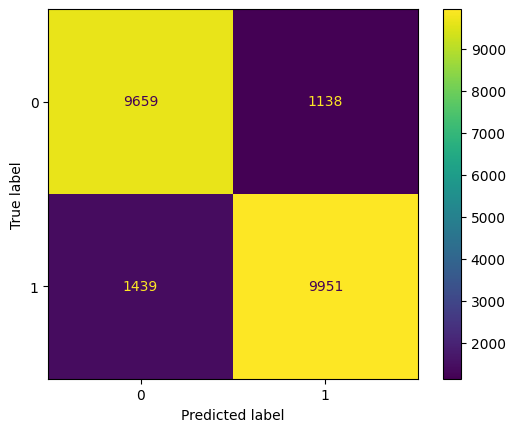

In [127]:
label=['0','1']
cmd=ConfusionMatrixDisplay(matx5,display_labels=label)
cmd.plot()

**TABLE FOR DIFFERENT ALGORITHMS**

In [130]:
dataset=pd.DataFrame({'before hyper_parameter_tuning':[86,83,86,87,88],'after hyper_parameter_tuning':[87,84,87,87,88]},index=['KNeighbors Classifier','Naive Bayes Classifier','Support Vector Classifier','Decision Tree classifier','Random forest classifier'])
dataset

,before hyper_parameter_tuning,after hyper_parameter_tuning
KNeighbors Classifier,86,87
Naive Bayes Classifier,83,84
Support Vector Classifier,86,87
Decision Tree classifier,87,87
Random forest classifier,88,88


_

**CONCLUSION**

The project aimed to develop a model that predicts whether an individual earns more than $50,000 annually based on various demographic and socio-economic features. Through exploratory data analysis, feature engineering, and model training, created a predictive model with satisfactory performance. The key factors influencing income included education level, occupation, workclass, age, and marital status. The selected machine learning models(such as Knn,NaiveBayes,Svm,Random Forest,Decision Tree)demonstrated promising performance, as evidenced by its accuracy, precision, recall, and F1 score on the test dataset.
Analyzing different classification techniques and considering their respective accuracies, it can be inferred that all the models demonstrated accuracies within the range of 83% to 88%. After hyper_parameter_tuning a slight change in accuracy occure only in Knn,Naive Bayes,Svm model. Accuracy of all other models remains the same. Notably,Random forest classifier exhibited a slightly higher accuracy of 88%.

__________

**SOURCE**

'kaggle datasets download -d wenruliu/adult-income-dataset'

                           
                           
                                                                                                                                           ANUSHA P O
                                           